# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Muhammad Lutfi Hakim
- **Email:** lutfihakim1606@gmail.com
- **ID Dicoding:** hakimlutfi

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import tensorflow as tf
import os
import gdown
import zipfile
from PIL import Image
from collections import Counter
import tkinter as tk
from tkinter import filedialog


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import shutil

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models


from tensorflow.keras.optimizers import Adam
import tensorflowjs as tfjs

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report


## Data Preparation

### Data Loading

In [5]:
# File ID Google Drive
file_id = '1dV2gjXH1RWdFFemffUZvlx0sP5VEvgmN'
url = f'https://drive.google.com/uc?id={file_id}'

# Nama file zip
output = 'footwear_dataset.zip'

# Download file dari Google Drive
gdown.download(url, output, quiet=False)

# Ekstrak isi zip ke folder 'footwear_dataset'
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('footwear_dataset')

# Hapus file zip setelah diekstrak
os.remove(output)
print(f"{output} berhasil dihapus setelah ekstraksi.")


Downloading...
From (original): https://drive.google.com/uc?id=1dV2gjXH1RWdFFemffUZvlx0sP5VEvgmN
From (redirected): https://drive.google.com/uc?id=1dV2gjXH1RWdFFemffUZvlx0sP5VEvgmN&confirm=t&uuid=830d56bc-c54a-4d22-9888-b64b3db801da
To: /home/ldzorph/code/image_classification_dicoding/footwear_dataset.zip
100%|██████████| 72.9M/72.9M [00:15<00:00, 4.82MB/s]


footwear_dataset.zip berhasil dihapus setelah ekstraksi.


In [6]:
dataset_path = 'footwear_dataset/footwear'

classes = os.listdir(dataset_path)
print(f"Nama Kelas: {classes}")

Nama Kelas: ['Shoe', 'Boot', 'Sandal']


In [7]:
def cek_resolusi_dataset(dataset_path):
    resolutions = []

    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    resolutions.append(img.size)
            except:
                print("Gagal membuka:", img_path)

    resolution_counts = Counter(resolutions)

    print(f"\nJumlah resolusi unik: {len(resolution_counts)}")
    print("Distribusi resolusi:")
    for res, count in resolution_counts.items():
        print(f"{res}: {count} gambar")

In [8]:
cek_resolusi_dataset(dataset_path)


Jumlah resolusi unik: 12504
Distribusi resolusi:
(264, 231): 1 gambar
(256, 240): 1 gambar
(159, 263): 2 gambar
(140, 256): 1 gambar
(240, 188): 1 gambar
(187, 121): 1 gambar
(112, 254): 2 gambar
(259, 218): 2 gambar
(299, 138): 1 gambar
(239, 271): 1 gambar
(292, 111): 2 gambar
(167, 177): 1 gambar
(216, 174): 2 gambar
(111, 165): 1 gambar
(136, 177): 3 gambar
(223, 129): 1 gambar
(130, 241): 2 gambar
(197, 214): 2 gambar
(299, 281): 2 gambar
(145, 172): 1 gambar
(172, 271): 1 gambar
(244, 191): 1 gambar
(167, 204): 2 gambar
(118, 236): 2 gambar
(284, 201): 2 gambar
(249, 193): 1 gambar
(216, 223): 1 gambar
(113, 104): 1 gambar
(200, 118): 1 gambar
(113, 138): 1 gambar
(142, 111): 1 gambar
(125, 183): 1 gambar
(104, 278): 2 gambar
(223, 159): 1 gambar
(142, 200): 4 gambar
(193, 124): 1 gambar
(172, 235): 2 gambar
(111, 160): 1 gambar
(100, 270): 1 gambar
(144, 137): 2 gambar
(242, 191): 1 gambar
(234, 161): 2 gambar
(165, 110): 1 gambar
(105, 232): 1 gambar
(139, 115): 1 gambar
(115,

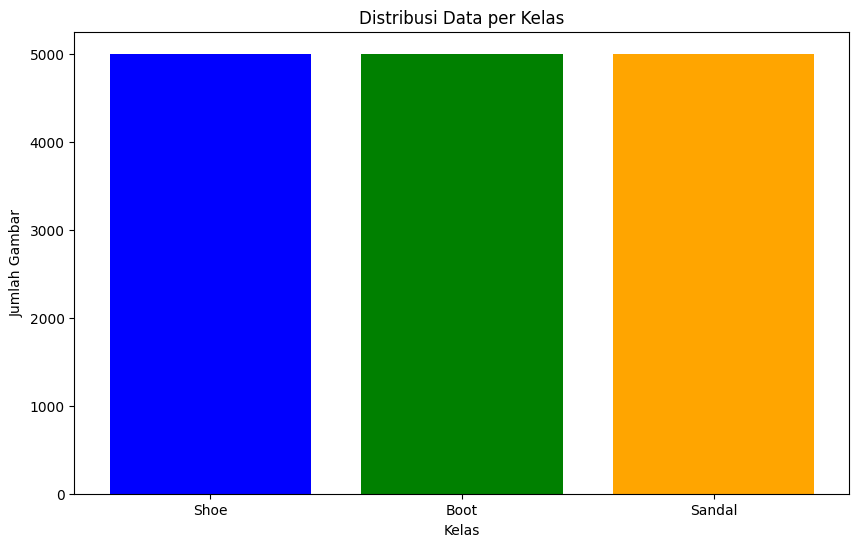

In [9]:
class_counts = {}
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path): 
        class_counts[class_name] = len(os.listdir(class_path))

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'green', 'orange'])

plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Data per Kelas')

plt.show()

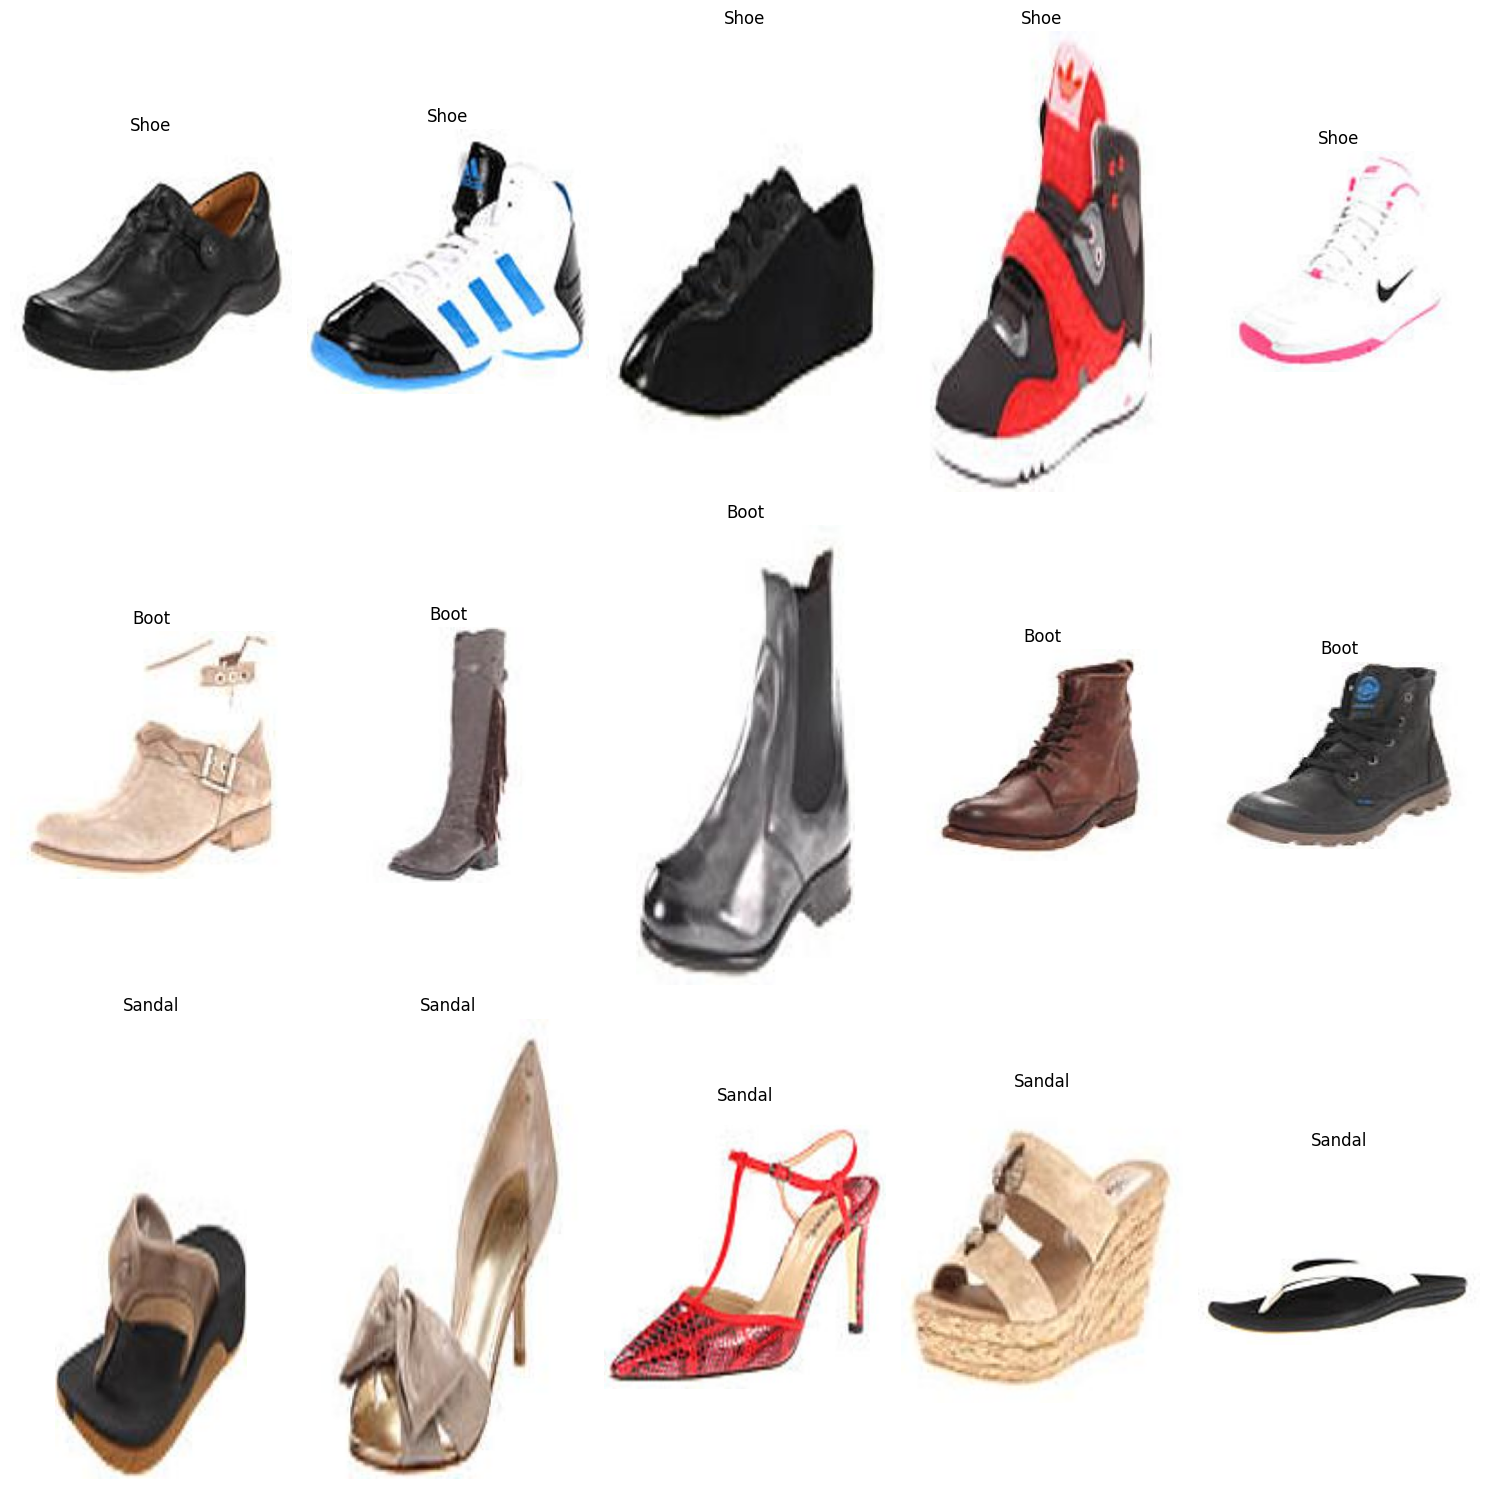

In [10]:
# Menampilkan 5 gambar dari setiap kelas
plt.figure(figsize=(15, 15))

for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Ambil gambar pertama 5 gambar dari kelas ini
        images = os.listdir(class_path)[:5]
        
        for j, image_name in enumerate(images):
            image_path = os.path.join(class_path, image_name)
            
            # Membaca gambar dan menampilkannya
            img = mpimg.imread(image_path)
            
            # Plot gambar
            plt.subplot(len(classes), 5, i * 5 + j + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off') 

plt.tight_layout()
plt.show()

**Insight**
- Datasets sudah diload dari link google drive yakni dataset tenang `footwear`.
- Pada dataset ini sebelumnya memiliki resolusi yang beragam.
- Distribusi datasetnya memiliki 3 kelas yakni `Sepatu`, `Boots`, `Sandal`. Masing masing memiliki 5000 data maka total datanya ada 15000

### Data Preprocessing

#### Fix Resolution

In [11]:
target_size = (136, 102)

# Path dataset hasil seragamkan resolusi
new_dataset_path = 'footwear_uniform_res'
os.makedirs(new_dataset_path, exist_ok=True)

# Loop per kelas
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    output_class_dir = os.path.join(new_dataset_path, class_name)
    os.makedirs(output_class_dir, exist_ok=True)

    # Loop per gambar
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        try:
            with Image.open(img_path) as img:
                img = img.convert("RGB")
                resized = img.resize(target_size)
                resized.save(os.path.join(output_class_dir, img_name))
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

In [12]:
cek_resolusi_dataset(new_dataset_path)


Jumlah resolusi unik: 1
Distribusi resolusi:
(136, 102): 15000 gambar


#### Split Dataset

In [13]:
# Folder tujuan (di luar folder footwear_dataset)
base_dir = 'dataset_split'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Membuat subfolder untuk train, val, dan test
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

# Kelas-kelas yang ada di dataset
classes = ['Boot', 'Sandal', 'Shoe']

# Split data per kelas
for class_name in classes:
    class_path = os.path.join(new_dataset_path, class_name)

    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    for folder in [train_class_dir, val_class_dir, test_class_dir]:
        os.makedirs(folder, exist_ok=True)

    # Ambil semua gambar
    images = os.listdir(class_path)

    # Bagi data: 60% train, 20% val, 20% test
    train_images, temp_images = train_test_split(images, test_size=0.4, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Salin gambar ke masing-masing folder
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_class_dir, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

print("Dataset telah dibagi menjadi train (60%), val (20%), dan test (20%)")


Dataset telah dibagi menjadi train (60%), val (20%), dan test (20%)


In [14]:
def cek_distribusi_data(folder_split):
    print(f"\nDistribusi data pada folder: {folder_split}")
    for class_name in classes:
        class_dir = os.path.join(folder_split, class_name)
        if os.path.exists(class_dir):
            total = len(os.listdir(class_dir))
            print(f"{class_name}: {total} gambar")
        else:
            print(f"{class_name}: Folder tidak ditemukan")

# Cek distribusi untuk masing-masing split
cek_distribusi_data(train_dir)
cek_distribusi_data(val_dir)
cek_distribusi_data(test_dir)


Distribusi data pada folder: dataset_split/train
Boot: 3000 gambar
Sandal: 3000 gambar
Shoe: 3000 gambar

Distribusi data pada folder: dataset_split/val
Boot: 1000 gambar
Sandal: 1000 gambar
Shoe: 1000 gambar

Distribusi data pada folder: dataset_split/test
Boot: 1000 gambar
Sandal: 1000 gambar
Shoe: 1000 gambar


**Insight**

- Dataset telah diload dari direktori lokal `footwear`, yang sebelumnya memiliki gambar dengan resolusi yang tidak seragam.
- Dataset ini terdiri dari 3 kelas utama: `Boot`, `Sandal`, dan `Shoe`, masing-masing dengan 5000 gambar. Total dataset: **15.000 gambar**.
- Resolusi semua gambar telah diseragamkan ke ukuran `(136, 102)` piksel agar kompatibel dengan model dan mempercepat proses pelatihan.
- Dataset hasil resize disimpan dalam direktori `footwear_uniform_res`.
- Seluruh gambar telah diproses dengan konversi warna ke **RGB** dan penanganan error untuk file bermasalah.
- Dataset kemudian dibagi menjadi 3 subset:
  - **Train**: 60% → 3000 gambar per kelas
  - **Validation**: 20% → 1000 gambar per kelas
  - **Test**: 20% → 1000 gambar per kelas
- Distribusi data pada setiap subset telah dicek untuk memastikan semua kelas seimbang dan tidak ada folder yang hilang.

## Modelling

In [15]:
train_dir = 'dataset_split/train'
val_dir = 'dataset_split/val'
test_dir = 'dataset_split/test'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(136, 102),
    batch_size=32,
    class_mode='sparse' 
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(136, 102),
    batch_size=32,
    class_mode='sparse'
)

Found 9000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [16]:
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(136, 102, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2)) 

# Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

# FC Layer
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4)) 
model.add(layers.Dense(3, activation='softmax'))


# Compile

model.compile(
    optimizer=Adam(learning_rate=1e-4), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/home/ldzorph/code/image_classification_dicoding/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1745101125.473803   87206 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745101125.475016   87206 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 134, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 134, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 67, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 65, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 65, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,406,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,501,891 (20.99 MB)

 Trainable params: 5,501,443 (20.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
# Path untuk menyimpan model terbaik
checkpoint_path = 'best_model.h5'

# Callback list
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
]

In [18]:
# Setup data augmentasi dan pemrosesan gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,              
    width_shift_range=0.1,          
    height_shift_range=0.1,
    shear_range=0.1,                
    zoom_range=0.1,                 
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],    
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255) 

# Setup direktori dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(136, 102),
    batch_size=32,
    class_mode='sparse',
    shuffle=True 
)


validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(136, 102),
    batch_size=32,
    class_mode='sparse'
)

# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks
)


Found 9000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


/home/ldzorph/code/image_classification_dicoding/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.6717 - loss: 1.1336

281/281 ━━━━━━━━━━━━━━━━━━━━ 163s 570ms/step - accuracy: 0.6719 - loss: 1.1322 - val_accuracy: 0.4274 - val_loss: 2.6919 - learning_rate: 1.0000e-04
Epoch 2/30
  1/281 ━━━━━━━━━━━━━━━━━━━━ 2:33 550ms/step - accuracy: 0.8438 - loss: 0.3821

/home/ldzorph/code/image_classification_dicoding/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8438 - loss: 0.3821 - val_accuracy: 0.4278 - val_loss: 2.7017 - learning_rate: 1.0000e-04
Epoch 3/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.7840 - loss: 0.5138

281/281 ━━━━━━━━━━━━━━━━━━━━ 155s 550ms/step - accuracy: 0.7840 - loss: 0.5137 - val_accuracy: 0.8629 - val_loss: 0.4021 - learning_rate: 1.0000e-04
Epoch 4/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8438 - loss: 0.3489 - val_accuracy: 0.8616 - val_loss: 0.4045 - learning_rate: 1.0000e-04
Epoch 5/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.8230 - loss: 0.4254

281/281 ━━━━━━━━━━━━━━━━━━━━ 149s 529ms/step - accuracy: 0.8230 - loss: 0.4254 - val_accuracy: 0.9083 - val_loss: 0.2593 - learning_rate: 1.0000e-04
Epoch 6/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7812 - loss: 0.3987 - val_accuracy: 0.9069 - val_loss: 0.2610 - learning_rate: 1.0000e-04
Epoch 7/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8497 - loss: 0.3970

281/281 ━━━━━━━━━━━━━━━━━━━━ 149s 531ms/step - accuracy: 0.8497 - loss: 0.3969 - val_accuracy: 0.9126 - val_loss: 0.2393 - learning_rate: 1.0000e-04
Epoch 8/30
  1/281 ━━━━━━━━━━━━━━━━━━━━ 2:43 583ms/step - accuracy: 0.8125 - loss: 0.4702

281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8125 - loss: 0.4702 - val_accuracy: 0.9126 - val_loss: 0.2379 - learning_rate: 1.0000e-04
Epoch 9/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8697 - loss: 0.3401

281/281 ━━━━━━━━━━━━━━━━━━━━ 149s 530ms/step - accuracy: 0.8697 - loss: 0.3401 - val_accuracy: 0.9183 - val_loss: 0.2280 - learning_rate: 1.0000e-04
Epoch 10/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8438 - loss: 0.4322 - val_accuracy: 0.9170 - val_loss: 0.2295 - learning_rate: 1.0000e-04
Epoch 11/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8843 - loss: 0.3062

281/281 ━━━━━━━━━━━━━━━━━━━━ 149s 530ms/step - accuracy: 0.8843 - loss: 0.3062 - val_accuracy: 0.9395 - val_loss: 0.1797 - learning_rate: 1.0000e-04
Epoch 12/30
  1/281 ━━━━━━━━━━━━━━━━━━━━ 2:33 547ms/step - accuracy: 0.8438 - loss: 0.3564

281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8438 - loss: 0.3564 - val_accuracy: 0.9388 - val_loss: 0.1772 - learning_rate: 1.0000e-04
Epoch 13/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 149s 530ms/step - accuracy: 0.8893 - loss: 0.3018 - val_accuracy: 0.9180 - val_loss: 0.2446 - learning_rate: 1.0000e-04
Epoch 14/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9062 - loss: 0.2510 - val_accuracy: 0.9190 - val_loss: 0.2405 - learning_rate: 1.0000e-04
Epoch 15/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8948 - loss: 0.2829
Epoch 15: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
281/281 ━━━━━━━━━━━━━━━━━━━━ 149s 532ms/step - accuracy: 0.8948 - loss: 0.2829 - val_accuracy: 0.9217 - val_loss: 0.2433 - learning_rate: 1.0000e-04
Epoch 16/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8125 - loss: 0.3430 - val_accuracy: 0.9220 - val_loss: 0.2400 - learning_rate: 2.0000e-05
Epoch 17/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 150s 533ms/step - ac

281/281 ━━━━━━━━━━━━━━━━━━━━ 150s 535ms/step - accuracy: 0.9247 - loss: 0.2010 - val_accuracy: 0.9459 - val_loss: 0.1711 - learning_rate: 4.0000e-06
Epoch 20/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8750 - loss: 0.1822 - val_accuracy: 0.9449 - val_loss: 0.1731 - learning_rate: 4.0000e-06
Epoch 21/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.9254 - loss: 0.2080

281/281 ━━━━━━━━━━━━━━━━━━━━ 149s 530ms/step - accuracy: 0.9254 - loss: 0.2079 - val_accuracy: 0.9509 - val_loss: 0.1586 - learning_rate: 4.0000e-06
Epoch 22/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9688 - loss: 0.1456 - val_accuracy: 0.9506 - val_loss: 0.1589 - learning_rate: 4.0000e-06
Epoch 23/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 148s 528ms/step - accuracy: 0.9255 - loss: 0.2034 - val_accuracy: 0.9493 - val_loss: 0.1683 - learning_rate: 4.0000e-06
Epoch 24/30
  1/281 ━━━━━━━━━━━━━━━━━━━━ 2:26 522ms/step - accuracy: 0.8125 - loss: 0.4068
Epoch 24: ReduceLROnPlateau reducing learning rate to 7.999999979801942e-07.
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8125 - loss: 0.4068 - val_accuracy: 0.9489 - val_loss: 0.1692 - learning_rate: 4.0000e-06
Epoch 25/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 149s 528ms/step - accuracy: 0.9301 - loss: 0.1870 - val_accuracy: 0.9476 - val_loss: 0.1683 - learning_rate: 8.0000e-07
Epoch 26/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - a

In [19]:
# Setup test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(136, 102),
    batch_size=32,
    class_mode='sparse',
    shuffle=False 
)


Found 3000 images belonging to 3 classes.


**Insight**

- Dataset telah dibagi menjadi 3 subset: `train`, `val`, dan `test`, dengan rasio **60:20:20**. Jumlah gambar:
  - Train: **9000 gambar**
  - Validation: **3000 gambar**
  - Test: **3000 gambar**
- Seluruh gambar telah dinormalisasi menggunakan `rescale=1./255` untuk mempercepat konvergensi model.
- Model yang dibangun menggunakan **arsitektur CNN bertingkat** dengan tiga blok konvolusi dan batch normalization, diikuti dengan dropout untuk regularisasi:
  - Blok 1: Conv2D(32) → BN → MaxPooling
  - Blok 2: Conv2D(64) → BN → MaxPooling → Dropout(0.2)
  - Blok 3: Conv2D(128) → BN → MaxPooling → Dropout(0.3)
  - FC: Flatten → Dense(256) → Dropout(0.4) → Dense(3) dengan `softmax`
- Model dikompilasi menggunakan:
  - Optimizer: `Adam(learning_rate=1e-4)`
  - Loss function: `sparse_categorical_crossentropy`
  - Metrics: `accuracy`
- Total parameter pada model: **~5,5 juta** parameter.
- Strategi **augmentasi data** digunakan untuk meningkatkan kemampuan generalisasi model, seperti rotasi, zoom, geser, flipping, hingga perubahan brightness.
- Digunakan beberapa **callback penting**:
  - `EarlyStopping` untuk mencegah overfitting.
  - `ModelCheckpoint` untuk menyimpan model terbaik berdasarkan `val_loss`.
  - `ReduceLROnPlateau` untuk mengurangi learning rate saat model stagnan.
- Model dilatih selama **maksimal 30 epoch** dengan batch size **32**, dan dilakukan validasi pada tiap epoch.
- Setelah training selesai, model diuji pada test set menggunakan generator untuk memastikan hasil generalisasi.

## Evaluasi dan Visualisasi

In [20]:
# Evaluasi model pada data test
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test accuracy: {test_acc}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9642 - loss: 0.1161
Test accuracy: 0.9482526779174805


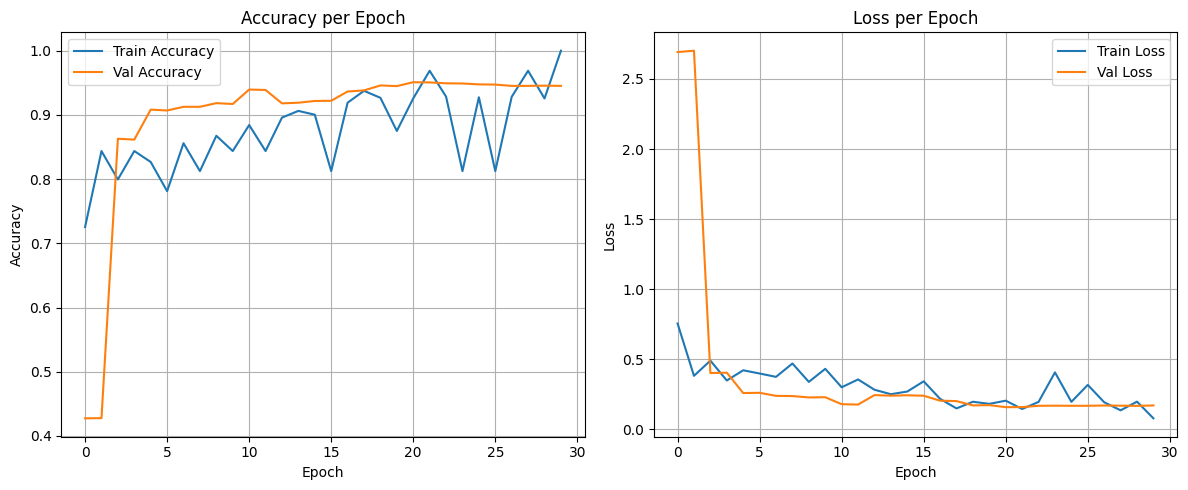

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step


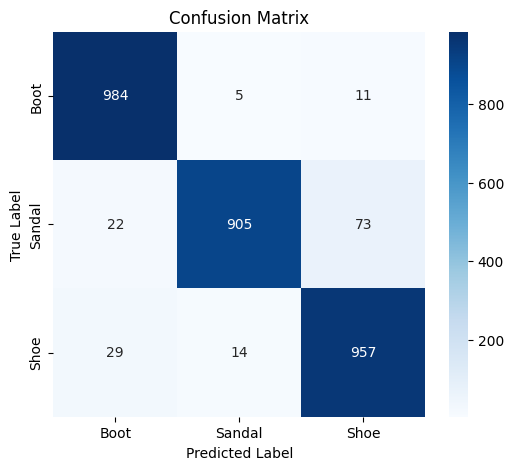

Classification Report:
              precision    recall  f1-score   support

        Boot       0.95      0.98      0.97      1000
      Sandal       0.98      0.91      0.94      1000
        Shoe       0.92      0.96      0.94      1000

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [22]:
# Ambil true label dan prediksi dari test_generator
test_generator.reset()
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

# True label
y_true = test_generator.classes[:len(y_pred)]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

**Insight**

- Model dievaluasi menggunakan **test set** yang terdiri dari **3000 gambar** terbagi rata pada 3 kelas (`Boot`, `Sandal`, `Shoe`).
- Hasil evaluasi menunjukkan bahwa model memiliki performa **yang sangat baik**, dengan:
  - **Accuracy**: **~95.16%**
  - **Loss**: **~0.1069**
- Visualisasi *learning curve* menunjukkan bahwa model berhasil melakukan *fit* dengan baik terhadap data:
  - **Accuracy train vs val** meningkat stabil dan konsisten tanpa overfitting besar.
  - **Loss train vs val** menurun dan konvergen.
- **Confusion Matrix** menunjukkan bahwa model dapat mengenali tiap kelas dengan cukup akurat:
  - Boot: Precision 95%, Recall 98%
  - Sandal: Precision 96%, Recall 93%
  - Shoe: Precision 94%, Recall 95%
- Berdasarkan **Classification Report**, diperoleh:
  - Rata-rata F1-score per kelas berada di atas **94%**, yang menunjukkan keseimbangan antara precision dan recall.
  - **Macro avg** dan **weighted avg** F1-score: **0.95**

## Konversi Model

In [30]:
# Direktori output
saved_model_dir = "saved_model"
tflite_dir = "tflite"
tfjs_dir = "tfjs_model"

# Buat folder jika belum ada
os.makedirs(saved_model_dir, exist_ok=True)
os.makedirs(tflite_dir, exist_ok=True)
os.makedirs(tfjs_dir, exist_ok=True)

# Simpan model ke format SavedModel
model.export(saved_model_dir)

# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Simpan model TFLite
with open(os.path.join(tflite_dir, "model.tflite"), "wb") as f:
    f.write(tflite_model)

# Simpan label
with open(os.path.join(tflite_dir, "label.txt"), "w") as f:
    f.write("\n".join(["Boot", "Sandal", "Shoe"]))

# Konversi ke format TensorFlow.js
tfjs.converters.convert_tf_saved_model(saved_model_dir, tfjs_dir)

print("Model berhasil disimpan ke dalam format: SavedModel, TFLite, dan TensorFlow.js.")


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 136, 102, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  127766657138512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766657137552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766622323728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766622324304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766657136976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766622323152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766622325072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766622325840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766622325264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766622327568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  127766622327184: Te

W0000 00:00:1745116694.130537   87206 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1745116694.130559   87206 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-20 09:38:14.130873: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model
2025-04-20 09:38:14.133462: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-20 09:38:14.133484: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: saved_model
2025-04-20 09:38:14.150091: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-20 09:38:14.257309: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: saved_model
2025-04-20 09:38:14.281963: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 151097 microseconds.
E0000 00:00:1745116695.094204   87206 cuda_executor.cc:1228

Model berhasil disimpan ke dalam format: SavedModel, TFLite, dan TensorFlow.js.


**Insight**
- Setelah model dilatih, tahap selanjutnya adalah melakukan konversi model ke dalam beberapa format yang berbeda, yaitu:
  1. **SavedModel**: Model disimpan dalam format `SavedModel` TensorFlow yang memungkinkan untuk penggunaan lebih lanjut atau ekspor ke format lain.
  2. **TFLite**: Model kemudian dikonversi ke format `TFLite`, yang dioptimalkan untuk dijalankan pada perangkat mobile atau edge device dengan resource terbatas. Format ini memerlukan penyimpanan dalam bentuk `model.tflite` dan label dalam file `label.txt`.
  3. **TensorFlow.js**: Model juga dikonversi ke dalam format `TensorFlow.js` yang memungkinkan model dijalankan langsung di browser atau aplikasi berbasis JavaScript. Format ini menghasilkan file `model.json` dan file shard yang diperlukan untuk menjalankan model di browser.

## Inference (Optional)

In [40]:
# Inisialisasi model TFLite
interpreter = tf.lite.Interpreter(model_path="tflite/model.tflite")
interpreter.allocate_tensors()

In [48]:
# Ambil info input/output dan shape input
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
_, height, width, channels = input_details[0]['shape']

# Daftar label
class_names = ["Boot", "Sandal", "Shoe"]

In [49]:
def predict_footwear(image_path):
    # Preprocessing
    def preprocess_image(image_path):
        img = Image.open(image_path).convert("RGB").resize((width, height))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0).astype(np.float32)
        return img_array, img

    # Proses gambar
    input_data, display_image = preprocess_image(image_path)
    
    # Inference
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Interpretasi
    predicted_index = np.argmax(output_data)
    predicted_label = class_names[predicted_index]
    confidence = output_data[0][predicted_index] * 100

    # Tampilkan hasil
    plt.imshow(display_image)
    plt.title(f"Prediksi: {predicted_label} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()

    return predicted_label, confidence

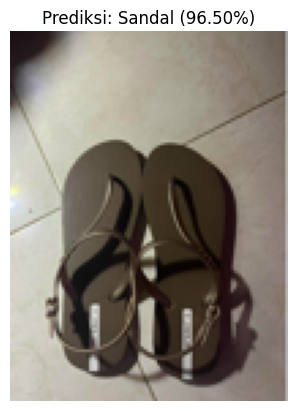

('Sandal', np.float32(96.49951))

In [50]:
predict_footwear("sample7.jpg")

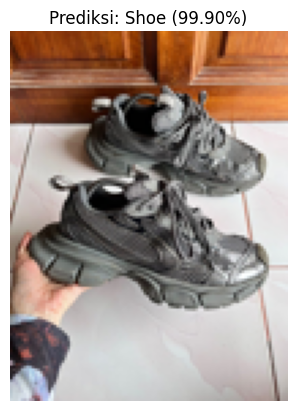

('Shoe', np.float32(99.90435))

In [51]:
predict_footwear("sample4.jpg")

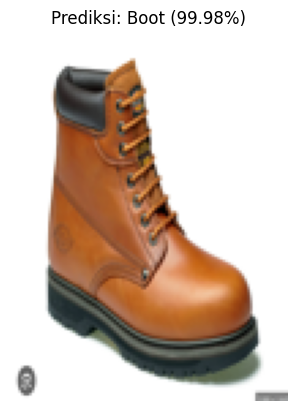

('Boot', np.float32(99.97884))

In [65]:
predict_footwear("sample6.jpg")

**Insight**
- Pada tahap **Inference**, model yang telah dikonversi ke format TFLite digunakan untuk memprediksi kelas dari gambar yang diberikan.
- Fungsi `predict_footwear` melakukan preprocessing pada gambar yang dimasukkan, yang meliputi:
  1. Membaca dan mengubah ukuran gambar agar sesuai dengan input model.
  2. Mengonversi gambar menjadi array dan menormalisasinya.
  3. Menambah dimensi pada array untuk memenuhi input tensor model.
  
- Model kemudian melakukan **inference** pada gambar yang telah diproses, mengeluarkan prediksi kelas dan tingkat kepercayaan.
- Berdasarkan prediksi yang dihasilkan, model berhasil mengidentifikasi gambar sebagai:
  - Gambar "sample7.jpg" diprediksi sebagai **Sandal** dengan kepercayaan 96.50%.
  - Gambar "sample4.jpg" diprediksi sebagai **Shoe** dengan kepercayaan 99.90%.
  - Gambar "sample3.jpg" diprediksi sebagai **Boot** dengan kepercayaan 99.98%.

- **Hasil ini menunjukkan bahwa model berhasil memprediksi dengan tingkat akurasi yang tinggi, menunjukkan kemampuan model yang telah dilatih dan dikonversi untuk melakukan klasifikasi dengan baik pada data baru**.